### Se copiaron los archivos XZ

cp ../e17e11-7-hi-sgra-SGRA/3601/plot/e17e11-7-hi-sgra-SGRA-LY.dat .

Graficar con sagA-hi-LY.plt

# Importing modules
import matplotlib.pyplot as plt

# Reading image using imread
image=plt.imread("sagA-hi-LY.eps")
plt.axis('off')
plt.figure(figsize=(20, 10))

# Displaying read image
plt.imshow(image)
plt.show()

Todos los archivos se van a:

cat e17e11-7-hi-sgra-SGRA-LY.dat >> sag-group-hi-LY.dat

Y borramos la columna LY

# Baseline

In [ ]:
freq = "hi"
baseline = "AZ"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from datetime import datetime, timedelta
import seaborn as sns
from astropy.time import Time
sns.set()

# RADIO

## Timeserie 

In [83]:
data_radio = np.loadtxt("AA_SELFC_HI_Apr11-new.dat",converters={0:lambda t: datetime.strptime(t.decode(), '%j:%Y:%H:%M:%S')}, delimiter='\t', dtype={
                            'names': ('time-new', 'time','amp', 'sigma',),
                            'formats': ('datetime64[s]', 'float', 'float', 'float')
                                }
                     )
#ordenamos ascendentemente
#data_radio = np.sort(data)[::1]

t_r = Time(data_radio['time-new']).mjd
y_r = data_radio['amp']
dy_r = data_radio['sigma']
#plt.plot(t_r,y_r, '.')
#plt.xlim[:]
#plt.errorbar(t_r,y_r, dy_r, linestyle='')
np.savetxt("AA_SELFC_HI_Apr11-datamash-mjd.dat", np.c_[t_r, y_r,dy_r])
#data_r.shape
t_r


array([57854.37506944, 57854.37511574, 57854.37516204, ...,
       57854.54496528, 57854.54530093, 57854.54534722])

In [84]:
t_r[-1] - t_r[0]

0.1702777777754818

plot

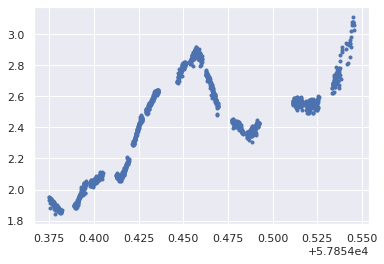

In [85]:
plt.plot(t_r,y_r, '.')
#plt.xlim[:]
#plt.errorbar(t_r,y_r, dy_r, linestyle='')

## Calulate standart deviation

In [86]:
a = data_radio['amp'].mean() - 3 * data_radio['amp'].std()
b = data_radio['amp'].mean() + 3 * data_radio['amp'].std()
a, b

(1.4767651547090432, 3.331726861254989)

In [87]:
data_radio.shape

(1615,)

In [88]:
new = data_radio
new

array([('2017-04-11T09:00:06',  9.00176   , 1.93149392, 0.0022337 ),
       ('2017-04-11T09:00:10',  9.00288   , 1.95181131, 0.0022561 ),
       ('2017-04-11T09:00:14',  9.004     , 1.95196533, 0.00225188), ...,
       ('2017-04-11T13:04:45', 13.07941333, 3.07116786, 0.00331076),
       ('2017-04-11T13:05:14', 13.08728   , 3.02866527, 0.00360336),
       ('2017-04-11T13:05:18', 13.0884    , 3.06077257, 0.00369049)],
      dtype=[('time-new', '<M8[s]'), ('time', '<f8'), ('amp', '<f8'), ('sigma', '<f8')])

### Clean data with 3-$\sigma$

In [ ]:
j = -1
n = 1
while(data_radio.shape[0] != j):
    i = 0
    f = 0
    for row in data_radio: 
        if (row[1] < a or row[1]) > b:
            f = row[1]
            data_radio = np.delete(data_radio, i, 0)
            if (i>0):
                break
        i = i + 1
        j = i
    if(data_radio.shape[0] != j):
        print("tenemos {} datos anomalos: {}".format(n, f))
    new = data_radio 
    n = n + 1

## New data with 3-$\sigma$

### With time in MJD

In [89]:
new_mjd = Time(new['time-new']).mjd
np.savetxt("AA_SELFC_HI_Apr11-mjd-3sigma.dat", np.c_[new_mjd, new['amp'], new['sigma']])
new_mjd

array([57854.37506944, 57854.37511574, 57854.37516204, ...,
       57854.54496528, 57854.54530093, 57854.54534722])

In [90]:
nuevo = np.array(np.c_[new_mjd, new['amp'], new['sigma']])

 Reescalamos por 100:
 
 $(x_{1}-x_{0})*100 + x_{0}$

In [91]:
scala = []
for fila in nuevo:
    scala.append((fila[0] - nuevo[0][0])*100 + nuevo[0][0])

In [92]:
np.savetxt("AA_SELFC_HI_Apr11-mjd-3sigma-sacaladoadias.dat", np.c_[scala, new['amp'], new['sigma']])

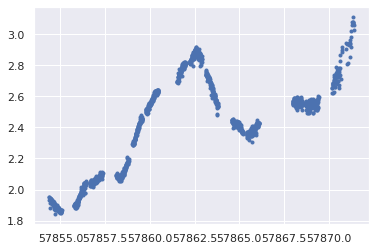

In [93]:
plt.plot(scala, new['amp'], '.')

In [94]:
ls_r = LombScargle(new_mjd, new['amp'], new['sigma'])
freq_r, power_r = ls_r.autopower()

Text(0, 0.5, 'Power')

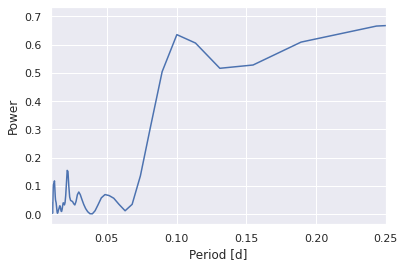

In [98]:
plt.plot(1./freq_r, power_r)
#plt.axhline(y=0.041, color='black', linestyle='--')
plt.xlim([0.01, .25])
#plt.ylim([0, .2])
plt.xlabel("Period [d]")
plt.ylabel("Power")

In [26]:
ls_r.false_alarm_probability(power=0.125)

3.9036620180981354e-60

In [27]:
probabilities = [0.1, 0.05, 0.01, 0.001]
ls_r.false_alarm_level(probabilities)

array([0.01088643, 0.01155573, 0.01306406, 0.01518475])

In [ ]:
best_frequency = freq_r[np.argmax(power_r)]
#ls = LombScargle(t, y, dy)
t_fit = np.linspace(0, 1)
y_fit = ls_r.model(t_fit, best_frequency)
plt.plot(y_fit)
best_frequency
#np.argmax(power_r)
#power_r
#freq_r[51]

## Aquí es el periodograma, pero escalado por lo que la periodicidad, solo hay que dividir entre 100, que es la que está arriba:

In [ ]:
ls_p = LombScargle(scala, new['flux'], new['err'])
freq_p, power_p = ls_p.autopower()
plt.plot(1./freq_p, power_p)
plt.xlim([3.5, 6])
plt.ylim([0, .06])



In [ ]:
#np.savetxt('sagA-LY-withoutOutliners.txt', np.c_[freq_r, power_r])

In [ ]:
ls_r.false_alarm_probability(power_r.max())